In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import pipeline
import gradio as gr

## Data Preparation

In [6]:
df = pd.read_csv("E:\Sentiment-Analysis-AliExpress\Data\Reviews.csv",sep="|")
df.head(5)

,buyerName,buyerCountry,Evaluation,buyerFeedback,buyerProductFeedBack,buyerTranslationFeedback,downVoteCount,upVoteCount,evalData,evaluationId,responsiveness,warrantyService,functionality,status
0,L***a,BR,100,Foi uma ótima compra. Item de acordo com o des...,NaN,Was a great buy. Item according to the describ...,0,0,09 Apr 2024,60080995549271264,NaN,NaN,NaN,1
1,Щ***ч,RU,100,Товар соответствует описанию. Визуально все в ...,NaN,Item as described. Visually everything is norm...,0,0,23 Jan 2024,50109430005211774,NaN,NaN,NaN,1
2,L***R,BR,100,"Possui um bom matéria, corrente bem fina pense...",NaN,"It has a good matter, very thin chain I though...",2,0,16 Dec 2023,60077029346436454,NaN,NaN,NaN,1
3,A***a,MX,100,no lo he probado pero parece lo suficientement...,NaN,I haven't tried it but it seems good enough to...,0,0,01 Jan 2024,60078089203734379,NaN,NaN,NaN,1
4,v***r,UA,100,Замовлення було швидко доставлено в Київ через...,NaN,Bulo Shvidko was delivered to Kiev through the...,0,0,06 Apr 2024,30070787000237584,NaN,NaN,NaN,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   buyerName                 2000 non-null   object 
 1   buyerCountry              2000 non-null   object 
 2   Evaluation                2000 non-null   int64  
 3   buyerFeedback             670 non-null    object 
 4   buyerProductFeedBack      0 non-null      float64
 5   buyerTranslationFeedback  670 non-null    object 
 6   downVoteCount             2000 non-null   int64  
 7   upVoteCount               2000 non-null   int64  
 8   evalData                  2000 non-null   object 
 9   evaluationId              2000 non-null   int64  
 10  responsiveness            0 non-null      float64
 11  warrantyService           0 non-null      float64
 12  functionality             0 non-null      float64
 13  status                    2000 non-null   int64  
dtypes: float

In [8]:
df.describe()

,Evaluation,buyerProductFeedBack,downVoteCount,upVoteCount,evaluationId,responsiveness,warrantyService,functionality,status
count,2000.000000,0.0,2000.000000,2000.00000,2.000000e+03,0.0,0.0,0.0,2000.0
mean,95.430000,NaN,0.084500,0.08050,4.303223e+16,NaN,NaN,NaN,1.0
std,13.557544,NaN,0.361144,0.43831,1.356860e+16,NaN,NaN,NaN,0.0
min,20.000000,NaN,0.000000,0.00000,2.004491e+16,NaN,NaN,NaN,1.0
25%,100.000000,NaN,0.000000,0.00000,3.006736e+16,NaN,NaN,NaN,1.0
50%,100.000000,NaN,0.000000,0.00000,3.007133e+16,NaN,NaN,NaN,1.0
75%,100.000000,NaN,0.000000,0.00000,6.007511e+16,NaN,NaN,NaN,1.0
max,100.000000,NaN,9.000000,10.00000,6.008124e+16,NaN,NaN,NaN,1.0


Handling Missing or Null Values


In [9]:
df.dropna(how='any',inplace=True,subset=['buyerFeedback'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 670 entries, 0 to 698
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   buyerName                 670 non-null    object 
 1   buyerCountry              670 non-null    object 
 2   Evaluation                670 non-null    int64  
 3   buyerFeedback             670 non-null    object 
 4   buyerProductFeedBack      0 non-null      float64
 5   buyerTranslationFeedback  670 non-null    object 
 6   downVoteCount             670 non-null    int64  
 7   upVoteCount               670 non-null    int64  
 8   evalData                  670 non-null    object 
 9   evaluationId              670 non-null    int64  
 10  responsiveness            0 non-null      float64
 11  warrantyService           0 non-null      float64
 12  functionality             0 non-null      float64
 13  status                    670 non-null    int64  
dtypes: float64(4), 

In [10]:
df = df.drop(columns= ['buyerProductFeedBack', 'responsiveness', 'warrantyService', 'functionality', 'status', 'buyerName', 'evaluationId']).reset_index()
df["Evaluation"] = df["Evaluation"]/20
df.head()

,index,buyerCountry,Evaluation,buyerFeedback,buyerTranslationFeedback,downVoteCount,upVoteCount,evalData
0,0,BR,5.0,Foi uma ótima compra. Item de acordo com o des...,Was a great buy. Item according to the describ...,0,0,09 Apr 2024
1,1,RU,5.0,Товар соответствует описанию. Визуально все в ...,Item as described. Visually everything is norm...,0,0,23 Jan 2024
2,2,BR,5.0,"Possui um bom matéria, corrente bem fina pense...","It has a good matter, very thin chain I though...",2,0,16 Dec 2023
3,3,MX,5.0,no lo he probado pero parece lo suficientement...,I haven't tried it but it seems good enough to...,0,0,01 Jan 2024
4,4,UA,5.0,Замовлення було швидко доставлено в Київ через...,Bulo Shvidko was delivered to Kiev through the...,0,0,06 Apr 2024


Explanatory Data Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_42028\275975881.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Evaluation',data=df,palette='viridis')


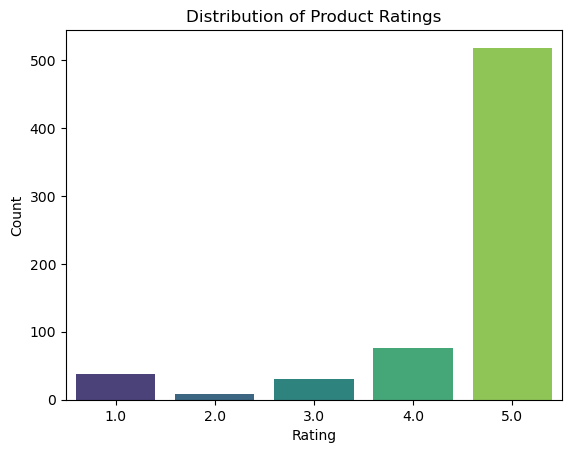

In [11]:
sns.countplot(x='Evaluation',data=df,palette='viridis')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

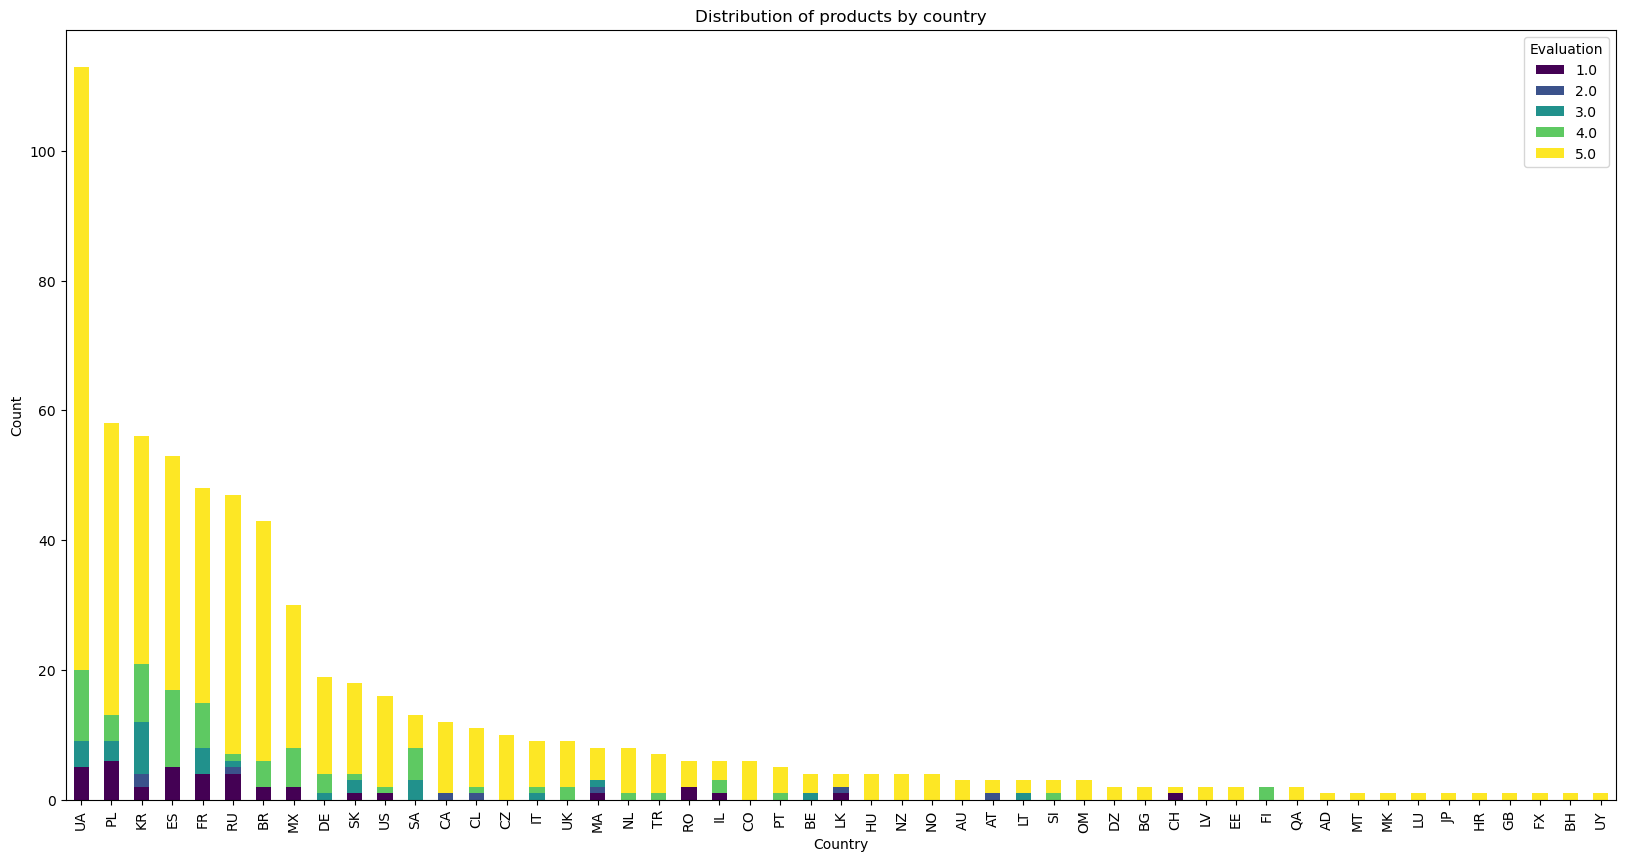

In [12]:
country_rating_counts=df.groupby(['buyerCountry','Evaluation']).size().unstack().fillna(0)
country_rating_counts['Total']=country_rating_counts.sum(axis=1)
country_rating_counts.sort_values(by='Total',ascending=False,inplace=True)
country_rating_counts.drop(columns='Total').plot(kind='bar',stacked=True,colormap='viridis',figsize=(20,10))
plt.title("Distribution of products by country")
plt.xlabel("Country")
plt.ylabel("Count")



Text Analysis

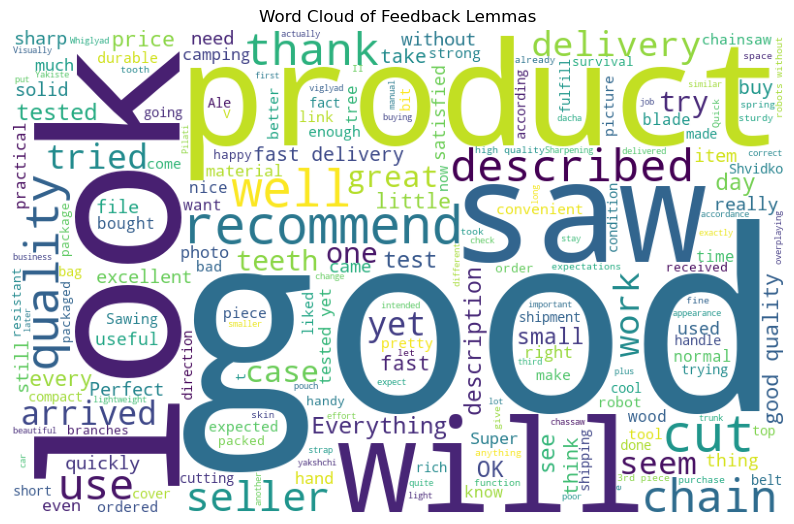

In [13]:
from wordcloud import WordCloud
all_lemmas=[word for sublist in df['buyerTranslationFeedback'] for word in sublist]

text=''.join(all_lemmas)

wordcloud=WordCloud(width=800,height=500,background_color='white').generate(text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud.to_image())
plt.axis('off')
plt.title('Word Cloud of Feedback Lemmas')
plt.show()

In [14]:
def map_rating_to_label(rating):
    if rating <= 2:
        return 0  # Negative
    elif rating == 3:
        return 1  # Neutral
    else:
        return 2  # Positive
    
df['SentimentLabel'] = df['Evaluation'].apply(map_rating_to_label)
df.head()

,index,buyerCountry,Evaluation,buyerFeedback,buyerTranslationFeedback,downVoteCount,upVoteCount,evalData,SentimentLabel
0,0,BR,5.0,Foi uma ótima compra. Item de acordo com o des...,Was a great buy. Item according to the describ...,0,0,09 Apr 2024,2
1,1,RU,5.0,Товар соответствует описанию. Визуально все в ...,Item as described. Visually everything is norm...,0,0,23 Jan 2024,2
2,2,BR,5.0,"Possui um bom matéria, corrente bem fina pense...","It has a good matter, very thin chain I though...",2,0,16 Dec 2023,2
3,3,MX,5.0,no lo he probado pero parece lo suficientement...,I haven't tried it but it seems good enough to...,0,0,01 Jan 2024,2
4,4,UA,5.0,Замовлення було швидко доставлено в Київ через...,Bulo Shvidko was delivered to Kiev through the...,0,0,06 Apr 2024,2


Train/Validation/Test Split

In [15]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['SentimentLabel'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['SentimentLabel'])

Tokenization with XLM-RoBERTa

In [23]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification,Trainer,TrainingArguments

tokenizer=AutoTokenizer.from_pretrained("xlm-roberta-base")

def tokenize(batch):
    return tokenizer(batch['buyerFeedback'],padding=True,truncation=True,max_length=128)


Dataset Conversion(Hugging Face Datasets)

In [24]:
from datasets import Dataset

train_ds=Dataset.from_pandas(train_df)
val_ds=Dataset.from_pandas(val_df)
test_ds=Dataset.from_pandas(test_df)

train_ds= train_ds.map(tokenize,batched=True)
val_ds= val_ds.map(tokenize,batched=True)
test_ds= test_ds.map(tokenize,batched=True)

train_ds.set_format('torch',columns=['input_ids','attention_mask','SentimentLabel'])
val_ds.set_format('torch',columns=['input_ids','attention_mask','SentimentLabel'])
test_ds.set_format('torch',columns=['input_ids','attention_mask','SentimentLabel'])

Map: 100%|██████████| 101/101 [00:00<00:00, 3903.44 examples/s]


Model Initialization

In [25]:
model=AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base",num_labels=3)

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
from transformers import TrainingArguments

training_args=TrainingArguments(
    output_dir='./results', 
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir='./logs',
    report_to="none",
)


Evaluation Metrics

In [27]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    accuracy = accuracy_score(labels, predictions)
    precision = precision_score(labels, predictions, average='weighted')
    recall = recall_score(labels, predictions, average='weighted')
    f1 = f1_score(labels, predictions, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

Trainer Setup and Training

In [28]:
from transformers import trainer

trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_42028\3527346214.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer=Trainer(


ValueError: The model did not return a loss from the inputs, only the following keys: logits. For reference, the inputs it received are input_ids,attention_mask.